<a href="https://colab.research.google.com/github/RebeccaKessler/Otter_Group_Project/blob/main/Otter_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
#importing packages
import numpy as np
import pandas as pd
import os
import re
import plotly.express as px
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
!pip install stargazer
from stargazer.stargazer import Stargazer
!pip install linearmodels
from linearmodels.panel import PanelOLS
from sklearn.linear_model import LinearRegression
import networkx as nx
from IPython.display import display, Image, Markdown, HTML

# **Feeding a warming world**
## Exploring the effect of increasing surface temperatures on potato yields.




<figure>
  <img src='https://civileats.com/wp-content/uploads/2019/02/190219-dairy-farmer-climate-change-carbon-farming-regenerative-agriculture-digging-potatoes-1.jpg' width="600" alt="Potato Harvest">
  <figcaption>Figure 1: Potato is one of the most important tuber crops for the human diet, Civil Eats Editors (2019)</figcaption>
</figure>

## 1.Context and Research Question


**Food staples** like maize, wheat, rice, and potatoes play a crucial role in human lives, constituting **90% of the world's calorie intake** (Food Staple Education, 2023).

**Potatoes**, often overlooked in research compared to cereal crops, hold particular significance for **developing nations** and remarkably yield up to **7 times more food per unit of water** than cereals (Schafleitner R., 2009).

Potato crop research tends to concentrate on predictive models, environmental factors, and region-specific analyses. Yet, crucial **questions remain unanswered**:

* How have changes in the Earth's surface temperature impacted global potato crop yields?
* What environmental and human-influenced variables are influencing this dynamic?
* And what implications does this hold for the Sustainable Development Goals (SDGs) and global food security?

**In short**, in this article you will find a global analysis of how surface temperature change has influenced potato crop yield since 1970.

Let's begin.

## 2.Introduction: How do Potatoes Grow?

Potatoes (*Solanum tuberosum L.*)  have a growing cycle of 120 days structured in 4 main stages: sprouting, vegetative growth, tuber growth, flowering, tuber bulking and maturation.

<figure>
  <img src='https://harvesttotable.com/wp-content/uploads/2022/07/Potato-bigstock-Potato-Plant-Growth-Cycle-Sta-433230881-1024x529.jpg' width=600>
  <figcaption>Figure 2: Potato plant growth cycle. Stages of growth from left to right are sprout development below ground, vegetative growth above ground, tuber growth, tuber bulking, and tuber maturation., Albert, S. (2023)</figcaption>
</figure>


Throughout these stages, **biochemical** and plant **physiological processes** define the growth rate of leaves and tubers. These processes are highly sensitive to environmental conditions such as temperature. **Potatoes grow best in cool but frost-free seasons and not very well in the heat**. The optimal range for tuberization and tuber growth is 15˚C - 20˚C.(Rykaczewska K., 2013)

Higher temperatures lead to tuberization reduction or inhibition because of accelerated plant respiration and fast leaf growth. These processes consume all the energy obtained through photosynthesis preventing the dry matter accumulation needed for the tubers. (Delleman, J. 2019).



## 3.Data Sources, Possible Biases and Methodology

### 3.1 Change in surface temperature throughout time.

Not all potatoes around the world have the same optimal temperature but they all react to extreme temperature changes as previously explained. For this reason, instead of using absolute temperature values, we will take the **annual change in surface temperature** (°C) from FAOSTAT (https://www.fao.org/faostat/) as our explanatory variable (see Appendix 1 for more details).

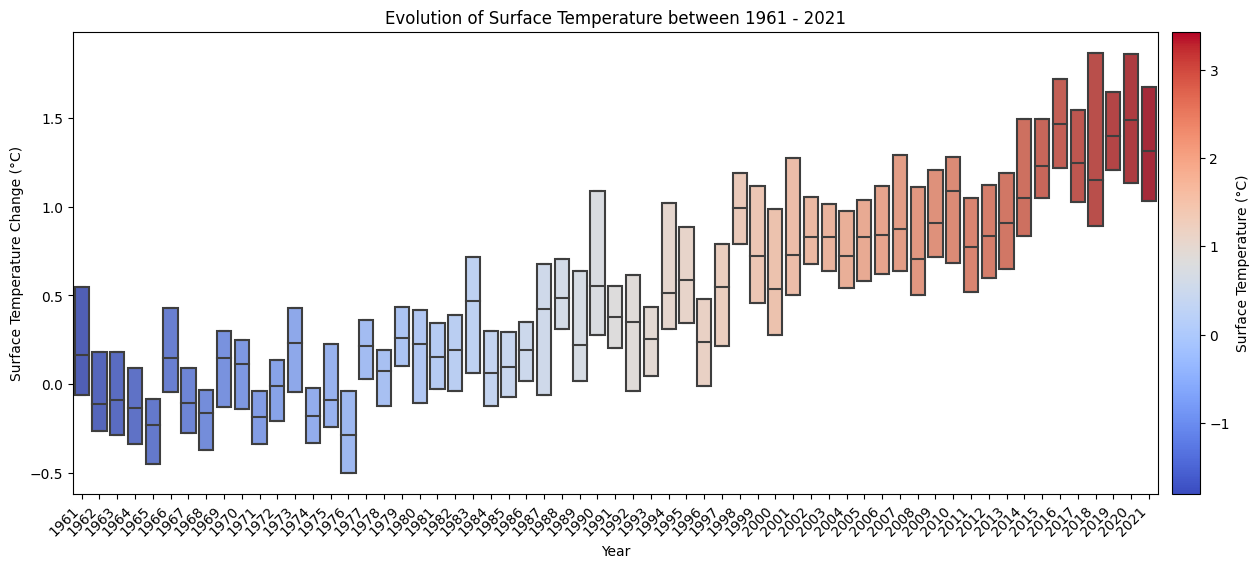

In [158]:
#importing clean dataset on temperature
url = "https://raw.githubusercontent.com/RebeccaKessler/Otter_Group_Project/main/Data%20for%20Final%20Project/Temp_1961-2021.csv"
df_temp = pd.read_csv(url)

#Plotting surface temperature change from 1961 to 2021
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=df_temp['Value'].min(), vmax=df_temp['Value'].max())
colors = cmap(norm(df_temp['Value']))

fig, ax = plt.subplots(figsize=(14, 6))

plot = sns.boxplot(x='Year', y='Value', data=df_temp, showfliers=False, showmeans=False, whis=[25, 75], palette='coolwarm', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Surface Temperature Change (°C)')
plt.title('Evolution of Surface Temperature between 1961 - 2021')


cax = fig.add_axes([0.91, 0.11, 0.02, 0.77])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Surface Temperature (°C)')

plt.show()


**Figure 3**: Global median change in surface temperature grouped per year.

The values in Figure 3 represent the mean annual surface temperature change with respect to a 1951–1980 baseline and are adjusted to correct for possible warming biases in urban centers due to heat-island effects.

As you can see, surface temperature change has been progressively increasing as anyone following the global warming news would expect.

But **is global warming homogeneous throughout all countries?** See the graph below (Figure 4)  to find out:


In [159]:
#importing temperature change raw data
url = "https://raw.githubusercontent.com/RebeccaKessler/Otter_Group_Project/main/Data%20for%20Final%20Project/Temp_raw.csv"
df_temp_raw = pd.read_csv(url)

#Creating Surface Temperature change map
df_temp_map1 = df_temp_raw[df_temp_raw['Year'] >= 2017]
df_temp_map1 = df_temp_map1[df_temp_map1['Year'] <= 2021]
df_map = df_temp_map1.groupby('Area')['Value'].mean().reset_index()
fig = px.choropleth(df_map,
                    locations='Area',
                    locationmode='country names',
                    color='Value',
                    hover_name='Area',
                    color_continuous_scale='reds')

fig.update_layout(
    title={'text': 'Average surface temperature change 2017 - 2021',
           'y': 0.95,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
)

# Change the color bar title to '°C'
fig.update_layout(coloraxis_colorbar_title='°C')

fig.show()

**Figure 4**: Average surface temperature change map (values from 2017 - 2021) compared to the baseline climatology (1951–1980). Gray color at Greenland and Antartica means no data available.

From the map (Figure 4) we see that during the last five years, **temperature has changed in an uneven way around the world**. The countries closer to the poles: **Russia, Canada and Europe** have experienced **higher temperature** changes due to physical feedback mechanisms such as the melting of ice and snow that leads to less radiation reflection and instead more heat absorption. (MIT Climate Portal, 2023)


### 3.2 Global potato yield distribution and evolution.

**Could it be that the increasing temperatures have decreased potato yields worldwide?**

Let’s first have a look at how potatoes are distributed globally. In the map below (Figure 5) you can see the annual potato yields for the year 2021 in metric tons (data also from the FAO database).

In [160]:
#Importing potato yield raw data
url = "https://raw.githubusercontent.com/RebeccaKessler/Otter_Group_Project/main/Data%20for%20Final%20Project/Potatoes.csv"
df = pd.read_csv(url)
df_t = df.loc[df.Unit == 't',['Area','Value','Year']]

#Creating a potato crop yield map for 2021
df_subset = df_t.loc[df_t.Year == 2021,: ]

df_log = df_subset.copy()
df_log['Value'] = np.log(df_log['Value'])

df_map = df_log.groupby('Area')['Value'].mean().reset_index()
fig = px.choropleth(df_map,
                    locations='Area',
                    locationmode='country names',
                    color='Value',
                    hover_name='Area',
                    color_continuous_scale='YlGn')

fig.update_layout(
    title={'text': 'Potato crop yield in metric tonnes per country in 2021',
           'y': 0.95,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
)


# Change the color bar title to 'Tonnes'
fig.update_layout(coloraxis_colorbar_title='Tonnes')

fig.show()


**Figure 5**: Annual potato crop yield in metric tonnes per country in 2021.

Potatoes are mainly distributed in the northern hemisphere with Asian and European countries as main contributors. In the southern hemisphere the crop is grown mainly at highlands in the Andes, India and Africa. (Devaux, A. et al. 2021)

To understand how crop yields have evolved over time, we calculated the yearly crop yields per harvested area to remove the effect of fluctuating demand and differences in cropland size.  Figure 6 shows the evolution of potato yields per hectares over time for each continent.


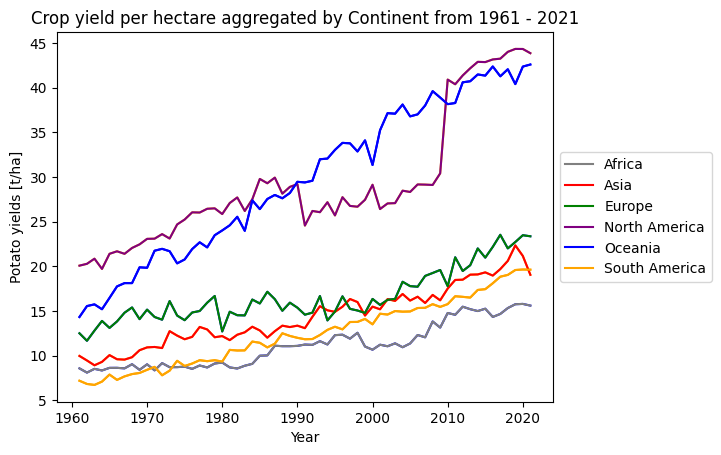

In [161]:
url = "https://raw.githubusercontent.com/RebeccaKessler/Otter_Group_Project/main/Data%20for%20Final%20Project/Potatoes_tha_continent.csv"
df_continent_tha = pd.read_csv(url)

grouped_data = df_continent_tha.groupby('Area')

for country, group in grouped_data:
    plt.plot(group['Year'], group['Value'])

colors = ["gray","red","green","purple","blue","orange"]
for i, (country, group) in enumerate(grouped_data):
    plt.plot(group['Year'], group['Value'], label=country, color=colors[i])

plt.title('Crop yield per hectare aggregated by Continent from 1961 - 2021')
plt.xlabel('Year')
plt.ylabel('Potato yields [t/ha]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

**Figure 6**: Aggregated crop yield per hectare meassured in tons per hectare by continent from 1961 - 2021.

Wait…

so according to Figure 6, potato yields per hectare have increased across continents largely in parallel with surface temperatures over most of the last 50 years. **Does this mean global warming promotes potato production?**

Maybe yes, but only within a certain range. We know now that temperature is key for potato growth. Interestingly, the last few years, which are also associated with the highest warming, show stagnating or even slightly decreasing potato yields but it is difficult to say with this graph. **What if we use a different measure?**

We could look at the yearly **growth rate** instead and control for potential intervening factors. This could tell us if warming temperatures lead to a decrease or even negative growth of potato crop yield per hectare over time.

Hence, our hypothesis is:

**As surface temperature increases, the yield rate decreases and eventually becomes negative once a critical threshold has been reached.**

To investigate our hypothesis we will first identify other variables that need to be considered through a Directed Acyclic Graphs (DAG). In a second step, we describe the data analysis methodology to examine the relationship between temperature change and yield rates. And finally, we present and discuss the results.

Note: We will refer to growth of potato crop yield per hectare as *“yield rate”* and to absolute values of potato crop yield per hectare simply as *“yield”* in the rest of the paper. The formula for calculating the growth rate can be found on “Appendix 1 Data cleaning”

### 3.3 Exploring environmental and anthropogenic variables interaction with yield and surface temperature.

Potatoes need three main things to grow: **nutrients**, **water**, and **light**.

**Nutrients** serve as building blocks for physiological processes and accumulation of dry matter in tubers. Potatoes need carbon from atmospheric CO<sub>2</sub> for photosynthesis (Thompson M., 2017). At the same time, atmospheric CO<sub>2</sub> is one of the main greenhouse gases associated with global warming therefor strongly correlated with changes in surface temperature.

Besides CO<sub>2</sub>, potatoes also require nitrogen, potassium, and phosphorus for metabolic processes, photosynthesis, and protein production (Gelaye Y., 2023). These can come from natural sources or through the use of fertilizer. In parallel to soil health degradation, the use of fertilizer has increased globally since 1970.

**Precipitation and irrigation systems** provide the necessary water for leaf growth. Potatoes will stop growing leaves under water stress as a survival mechanism, thereby  reducing their photosynthetic capacity and therefore decreasing yield (Schafleitner R., 2009). This is not the only channel through which precipitation and irrigation might affect our analysis. Rainfall and irrigation also has a cooling effect on the surface through increasing evapotranspiration, the water transfer from the soil and plants into the atmosphere in the form of vapor. (Yang Q., 2020)

Additionally, **solar radiation**, which depends on latitude and altitude, is indispensable for photosynthesis and directly affects surface temperature.

Lastly, **surface temperature** is also influenced by heat-island effects in urban areas and crop yield can be affected by environmental anomalies and plant intrinsic resistance to diseases and stressors (Pradel W., 2019). Both urban growth and environmental anomalies have thereby increased over time and might thus move in parallel with our variables.

All these variables appear to directly influence yield while also being correlated with surface temperatures. We thus need to account for them in our analysis as summarized in the following Directed Acyclic Graph.







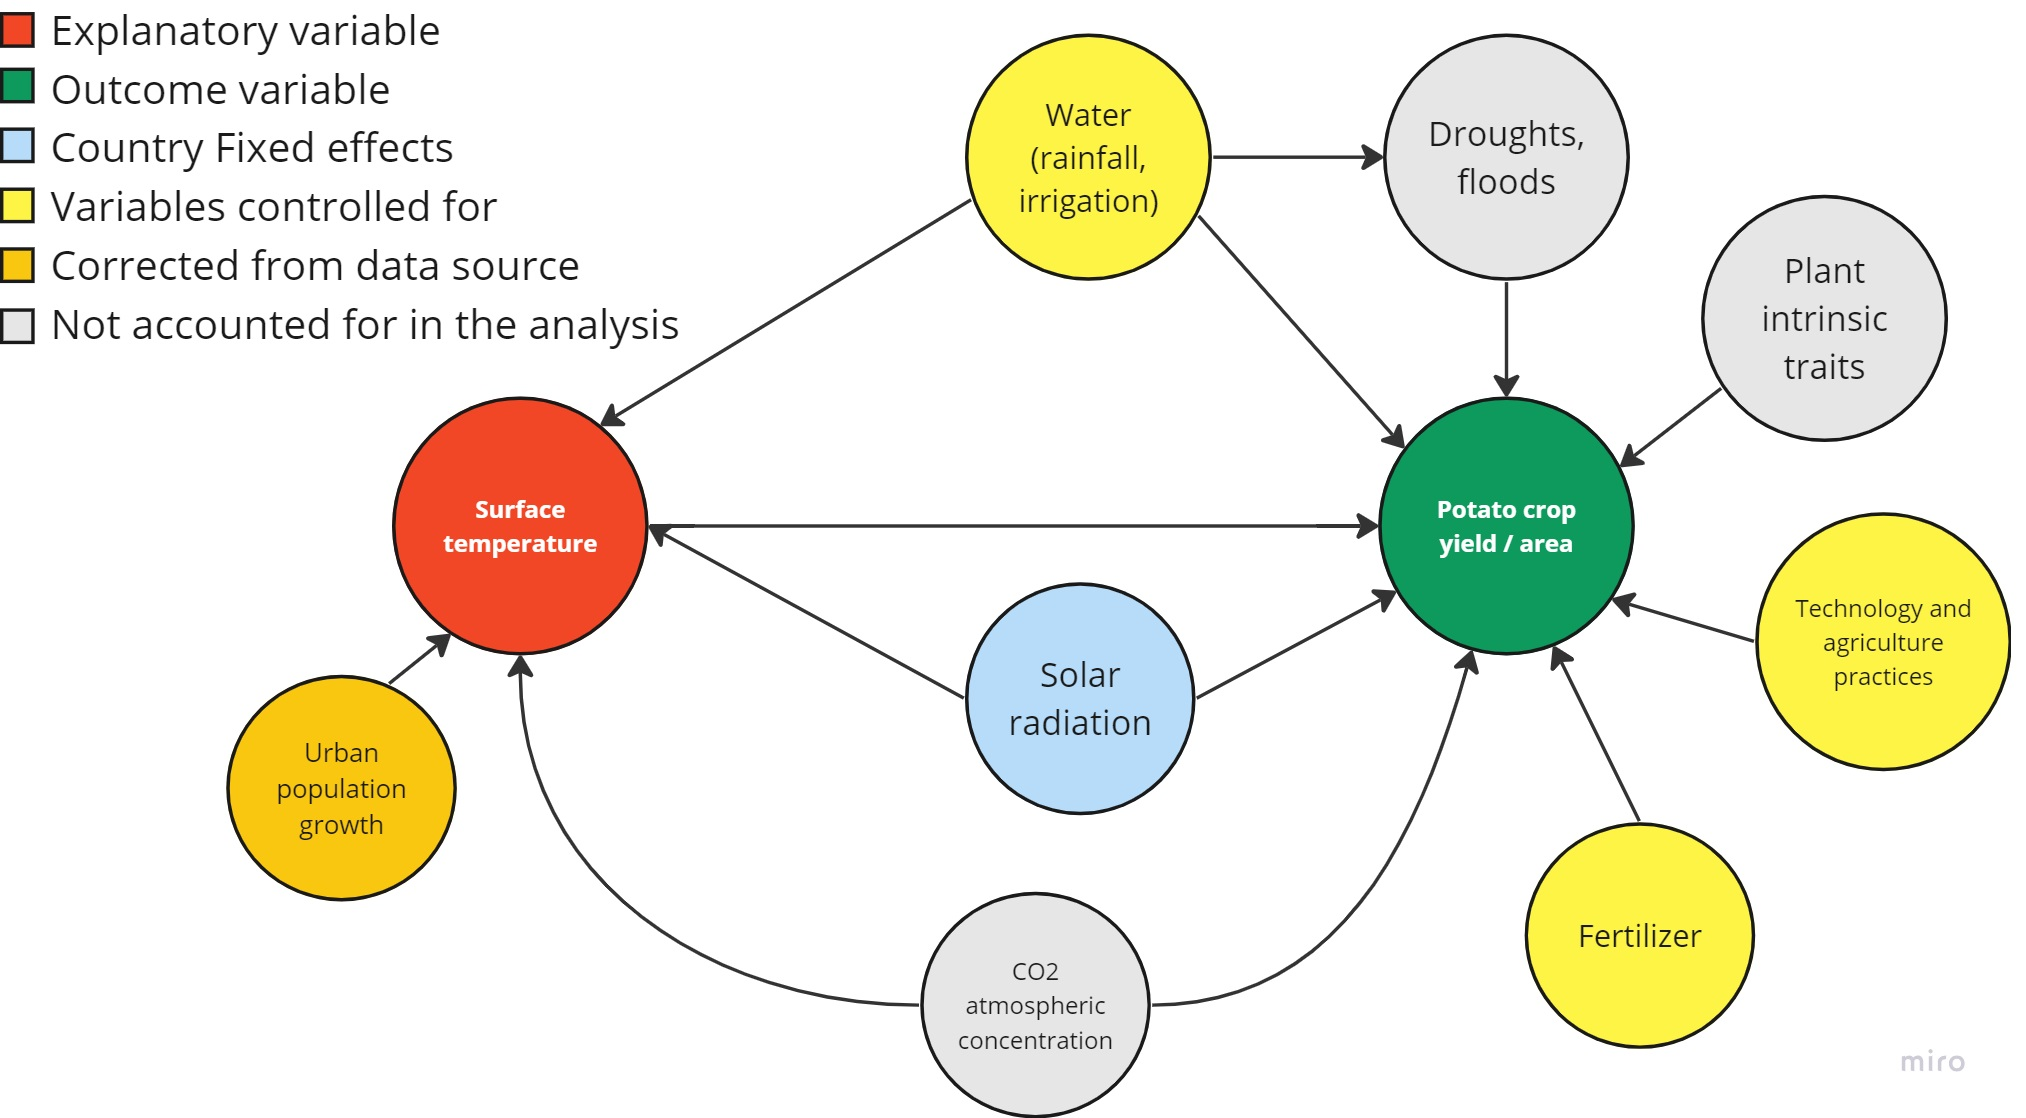

<sub>Figure 7: DAG - Variables to control for: rainfall, fertilizer use, agriculture technology and practices, and irrigation. Country-specific fixed effects assumed constant through time will be geographical characteristics such as latitude and altitude that will account for solar radiation. The surface temperature change data from FAOSTAT is already controlled for urban heating effects, therefore we will not consider urbanization data as a control.</sub>

In [162]:
# Displaying a DAG
Image(filename='DAG.jpg')
image_filename = 'DAG.jpg'  # Replace 'DAG.jpg' with your uploaded image filename

# Display the image
img = Image(filename=image_filename)
display(img)
# DAG footnote
display(Markdown(
    '<sub>Figure 7: DAG - Variables to control for: rainfall, fertilizer use, agriculture technology and practices, and irrigation. Country-specific fixed effects assumed constant through time will be geographical characteristics such as latitude and altitude that will account for solar radiation. The surface temperature change data from FAOSTAT is already controlled for urban heating effects, therefore we will not consider urbanization data as a control.</sub>'
    ))

### 3.4 Method


Now that we understand the mechanisms behind surface temperature and potato yield we will describe the methodology to follow.

Potatoes are grown from November to March in the Southern hemisphere and from May to September in the North hemisphere. We will hence run the analysis on these seasonal temperatures and rainfall patterns rather than yearly values. For the result section, when speaking about temperature change and rainfall anomalies, we are hence referring to changes in temperature and rainfall during the respective growing season (see Appendix 1 for details).

In a first step, we construct a linear regression model correlating annual yield rates with changes in surface temperature. This model uses panel data from 1970 to 2020 across 97 countries, incorporating both control variables (fertilizer use, GDP per capita, and precipitation) and country-specific fixed effects (geographical factors) as outlined in section 3.3. The mathematical representation of the model is articulated as follows:

<br><br>
$$
G_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \beta_3X_{3i} + \beta_4X_{4i}+ \beta_5X_{5i}+ \delta_1u_{1,i}+ ... + \delta_Nu_{N,i} + \epsilon_i
$$
<br>
Where:
- G<sub>i</sub> = Growth of crop yield per hectare (ton/ha)
- β<sub>0</sub> = Regression intercept
- β<sub>1</sub>X<sub>1i</sub> = Surface temperature change (°C) term
- β<sub>2</sub>X<sub>2i</sub> = GDP per capita (USD) proposed control for the agricultural infrastucture and technology.

- β<sub>3</sub>X<sub>3i</sub> = Fertilizer use per harvested area (g/ha)
- β<sub>4</sub>X<sub>4i</sub> = Precipitation (mm/country constant)
- β<sub>5</sub>X<sub>5i</sub> = Irrigation (% land actually irriagted over total agricultural land)
- δ<sub>1</sub>u<sub>1,i</sub>+ ... + δ<sub>N</sub>u<sub>N,i</sub> = Country specific fixed effects
- ϵ<sub>i</sub> = standard error term



Next, we implement a regression discontinuity design to investigate the presence of a temperature threshold, which was set at 2°C aligned with Pulatov B., et al. (2014)’s exploration of critical temperature shocks on potato yield.

Subsequently, we explore the influence of rainfall on the correlation between surface temperature changes and yield rates. Rainfall might amplify or dampen the impact of temperature on yield. Low rainfall is expected to worsen the impact while high rainfall might help to mitigate it. (Stark, J.C. et al. 2013)

Last but not least, we explore a Difference-in-Difference model, comparing the yield rates of Italy (treatment country) and Greece (control country) during a critical temperature shock period.


## 4. Results

The time has come to see what the data tells us!

For visual aid, the following sections will only show a cross-section of our analysis covering the years 2018-2020. The complete panel analysis containing all years as well as more details can be found in the Appendix 2.


In [163]:
#importing our datasets for visualization
url = "https://raw.githubusercontent.com/RebeccaKessler/Otter_Group_Project/main/Data%20for%20Final%20Project/cross_section_data.csv"
df_cross = pd.read_csv(url)

# Definition of continents
Africa = ["Algeria",'Angola','Cameroon','Central African Republic','Chad','Democratic Republic of the Congo','Egypt','Eswatini','Ethiopia PDR', 'Kenya','Lesotho','Libya','Madagascar',"Malawi","Mauritania",  'Mauritius',  'Morocco',  'Mozambique',  'Nigeria',  'Senegal', 'South Africa',  'Tunisia', 'Uganda',  'United Republic of Tanzania',  'Zambia','Zimbabwe']
NA = ['Canada','Cuba','Dominica','Dominican Republic','El Salvador','Guatemala','Haiti','Honduras', "Mexico",  'Nicaragua',  'United States of America']
SA = ['Argentina','Bolivia (Plurinational State of)','Brazil','Chile','Colombia','Ecuador', "Paraguay",  'Peru', 'Uruguay', 'Venezuela (Bolivarian Republic of)']
Asia = ["Afghanistan",'Bangladesh','Bhutan','Cyprus',"China","Democratic People's Republic of Korea",'India','Indonesia','Iran (Islamic Republic of)','Iraq','Israel', 'Japan','Jordan',"Lao People's Democratic Republic", 'Lebanon',  'Mongolia',  'Myanmar',  'Nepal',  'Pakistan',  'Philippines',  'Republic of Korea', 'Saudi Arabia',  'Sri Lanka',  'Syrian Arab Republic',  'Thailand',  'Türkiye',  'Viet Nam']
Europe = ["USSR",'Albania','Austria','Belgium-Luxembourg','Bulgaria','Czechoslovakia','Denmark','Faroe Islands','Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Italy', "Malta",  'Netherlands (Kingdom of the)',  'Norway',  'Poland', 'Portugal',  'Romania',  'Spain', 'Sweden',  'Switzerland',  'United Kingdom of Great Britain and Northern Ireland',  'Yugoslav SFR']
Oceania = ['Australia','Fiji','French Polynesia', "New Caledonia", 'New Zealand', 'Papua New Guinea']

### 4.1 Linear regression analysis of potato growth rates and changes in surface temperature

Let’s have a look at the results of our baseline linear regression.

In [164]:
#importing packages
import numpy as np
import pandas as pd
import os
import re
import plotly.express as px
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
!pip install stargazer
from stargazer.stargazer import Stargazer
!pip install linearmodels
from linearmodels.panel import PanelOLS
from sklearn.linear_model import LinearRegression

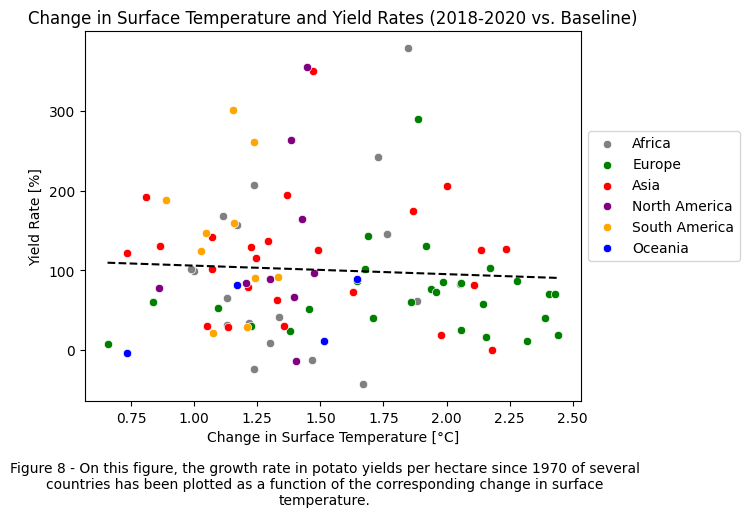

In [165]:
# Linear, cross-section regression without outliers (no controls)

for continent_list, continent_name in [(Africa, 'Africa'), (Europe, 'Europe'), (NA, 'North America'), (SA, 'South America'), (Asia, 'Asia'), (Oceania, 'Oceania')]:
    df_cross.loc[df_cross['Area'].isin(continent_list), 'continent'] = continent_name

continent_colors = {
    "Africa": "grey",
    "Europe": "green",
    "Asia": "red",
    "North America": "purple",
    "South America": "orange",
    "Oceania": "blue",
}

# Scatter plots
for continent, color in continent_colors.items():
    subset = df_cross[df_cross["continent"] == continent]
    sns.scatterplot(x=subset["Value_T"], y=subset["Value_Y"], label=continent, color=color)

# Linear regression
x = df_cross.sort_values("Value_T").Value_T
y = df_cross.sort_values("Value_T").Value_Y

ols_canned_results = sm.OLS.from_formula('Value_Y ~ Value_T', df_cross).fit()
slope = ols_canned_results.params[1]
intercept = ols_canned_results.params[0]

trendline = slope * x + intercept

# Plot regression line without label
plt.plot(x, trendline, '--', color='k', label='_nolegend_')

# Set labels and title
plt.xlabel('Change in Surface Temperature [°C]')
plt.ylabel('Yield Rate [%]')
plt.title('Change in Surface Temperature and Yield Rates (2018-2020 vs. Baseline)')

# Create legend for scatter plots only
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.75))
text = "Figure 8 - On this figure, the growth rate in potato yields per hectare since 1970 of several countries has been plotted as a function of the corresponding change in surface temperature."
plt.figtext(0.5,-0.1, text, ha='center', fontsize=10, color='k',wrap=True)

# Show the plot
plt.show()

In Figure 8 we can observe that almost all yield rates are positive, meaning that yields have increased nearly all over the globe since 1970 despite the global increase in surface temperatures. However increasing temperatures seem to be correlated with decreasing yield rates, illustrated by the negative slope. This is also reflected in the full panel analysis (Appendix 2.2.3).   
We can also see that different continents have experienced different yield rate patterns so we could argue that a global study is not the most adequate approach. To verify our reasoning we ran a linear regression for each continent and the negative relationship between surface temperature increase and yield rates persisted for all of them (see Appendix 2.5.1).
<br><br>
Hence, the result shows that, while global warming has not yet caused a significant global decrease in absolute yield, it has led to a decrease in yield rates. On average, **a 1°C increase in surface temperatures is correlated with a 1.6 decrease in the yearly yield rate**. This result is statistically significant at the 5-% level (p<0.05).
Interestingly, the panel analysis also shows that the countries with the highest warming  (>2°C) are the ones that have experienced nearly exclusively yield rates close to zero or even negative. In line with our hypothesis, the effect of temperatures on yield rates thus might indeed become more negative after a certain threshold.


**What happens if we introduce such a threshold into our regression?**

### 4.2 A regression discontinuity design to explore a potential warming threshold

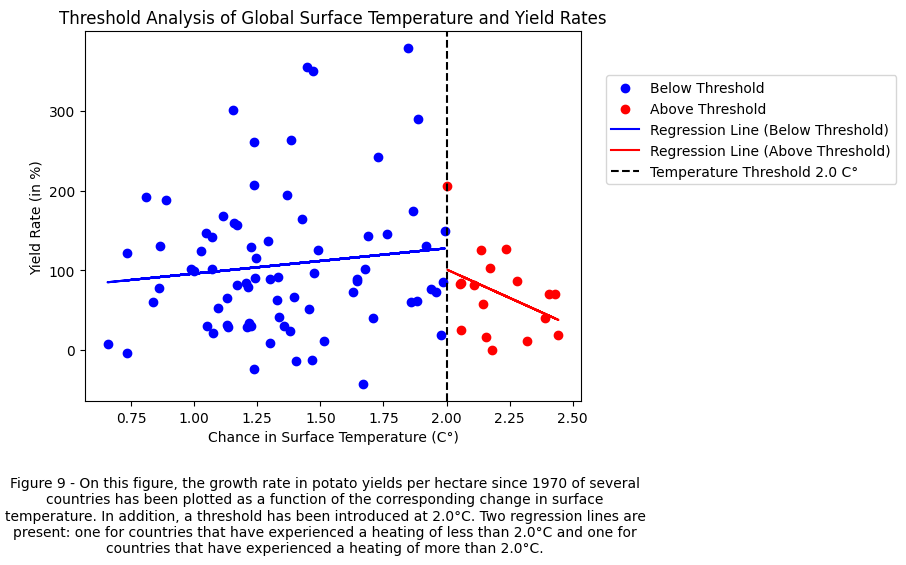

In [166]:
# creating a temperature threshold for the discontinuity regression analysis
threshold = 2
df_cross['dummy_temp'] = df_cross['Value_T'] >= threshold
df_cross["dummy_temp"] = df_cross["dummy_temp"].astype(int)
#run linear regression with threshold
temperature = df_cross['Value_T']
potato_yield = df_cross['Value_Y']

# Create a dummy variable (1 if above threshold, 0 if below threshold)
df_cross['above_threshold'] = (temperature > threshold).astype(int)

# Split the data into two subsets based on the dummy variable
df_below_threshold = df_cross[df_cross['above_threshold'] == 0]
df_above_threshold = df_cross[df_cross['above_threshold'] == 1]

# Fit linear regression models for each subset
model_below_threshold = LinearRegression().fit(df_below_threshold['Value_T'].values.reshape(-1, 1), df_below_threshold['Value_Y'])
model_above_threshold = LinearRegression().fit(df_above_threshold['Value_T'].values.reshape(-1, 1), df_above_threshold['Value_Y'])

# Predict the yields using the fitted models
predictions_below_threshold = model_below_threshold.predict(df_below_threshold['Value_T'].values.reshape(-1, 1))
predictions_above_threshold = model_above_threshold.predict(df_above_threshold['Value_T'].values.reshape(-1, 1))

# Plot the data and regression lines
plt.scatter(df_below_threshold['Value_T'], df_below_threshold['Value_Y'], color='blue', label='Below Threshold')
plt.scatter(df_above_threshold['Value_T'], df_above_threshold['Value_Y'], color='red', label='Above Threshold')

plt.plot(df_below_threshold['Value_T'], predictions_below_threshold, color='blue', label='Regression Line (Below Threshold)')
plt.plot(df_above_threshold['Value_T'], predictions_above_threshold, color='red', label='Regression Line (Above Threshold)')

plt.axvline(x=threshold, color='black', linestyle='--', label='Temperature Threshold 2.0 C°')

plt.legend(loc='upper right', bbox_to_anchor=(1.65, 0.9))
plt.title('Threshold Analysis of Global Surface Temperature and Yield Rates')
plt.xlabel('Chance in Surface Temperature (C°)')
plt.ylabel('Yield Rate (in %)')
text = "Figure 9 - On this figure, the growth rate in potato yields per hectare since 1970 of several countries has been plotted as a function of the corresponding change in surface temperature. In addition, a threshold has been introduced at 2.0°C. Two regression lines are present: one for countries that have experienced a heating of less than 2.0°C and one for countries that have experienced a heating of more than 2.0°C."
plt.figtext(0.5,-0.2, text, ha='center', fontsize=10, color='k',wrap=True)
plt.show()

To explore whether the correlation between increasing temperatures and yield rates becomes more pronounced after a certain warming threshold is reached, we employ a discontinuity regression analysis. A cross-section of the fitted discontinuity regression with the 2°C (Pulatov B., et al. 2015) threshold is shown in Figure 9.

After the threshold, the regression coefficient of temperature drops drastically. While the cross-section amplifies this effect, the discontinuity in the panel setting shows the same trend (see Appendix 2.2.4). The coefficient estimate of -9.5 tells us that the impact of temperature on yield growth is on average 9.5 units more negative once temperature has surpassed 2°C. This result is statistically significant at the 1-% level (p=0.0002) supporting the hypothesis that increasing temperature leads to decreasing yield rates and that this interaction becomes stronger after reaching a critical threshold.

Important to note is that the amount of data points beyond the threshold is limited due to the fact that surface temperatures have only increased above 2°C in a few countries and years (fortunately!). The result might thus not be robust enough to make any predictions. Nevertheless, the analysis might hint at what could happen if temperatures above 2°C become the new norm.


### 4.3 Exploring Heterogeneity: The Interaction of Temperature and Rainfall

As shown in our results so far, increasing temperatures are negatively correlated with yield rates, particularly after reaching a critical threshold. Rainfall can mitigate surface temperature increase through the evapotranspiration cooling effect and a lack of it might potentiate tuber growth inhibition (Stark, J.C. et al. 2013). Due to the strong effect rain can have on potato production, it could be interesting to see how the relationship between change in surface temperatures and yield rates is affected by rainfall. To analyze this effect, we compare years with above average rainfall to those with below average rainfall. Figure 10 illustrates this interaction.


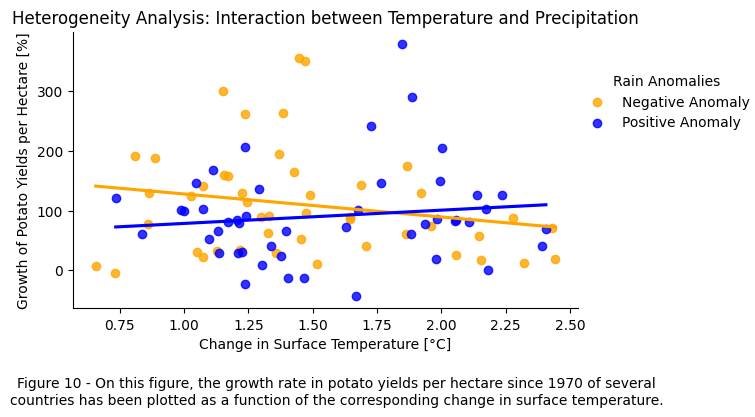

In [167]:
#heterogeneity in cross-section
threshold = 0
df_cross['dummy_rain'] = df_cross['Value_Prec_Anom'] >= threshold
df_cross["dummy_rain"] = df_cross["dummy_rain"].astype(int)

color_palette = {0: 'orange', 1: 'blue'}

# Use the palette parameter in lmplot
scatter_plot = sns.lmplot(x='Value_T', y='Value_Y', data=df_cross, hue="dummy_rain",
                          palette=color_palette, height=3.5, aspect=1.7, ci=False)

# Customize labels and title
scatter_plot.set_axis_labels('Change in Surface Temperature [°C]', 'Growth of Potato Yields per Hectare [%]')
plt.title('Heterogeneity Analysis: Interaction between Temperature and Precipitation')

# Customize legend
scatter_plot._legend.set_title('Rain Anomalies')  # Set the legend title
new_labels = ['Negative Anomaly', 'Positive Anomaly']  # Replace with your actual labels
for t, l in zip(scatter_plot._legend.texts, new_labels): t.set_text(l)
scatter_plot._legend.set_bbox_to_anchor((1.1, 0.9))

text = "Figure 10 - On this figure, the growth rate in potato yields per hectare since 1970 of several countries has been plotted as a function of the corresponding change in surface temperature."
plt.figtext(0.5,-0.1, text, ha='center', fontsize=10, color='k',wrap=True)
# Show the plot
plt.show()

The result shows that rainfall indeed compensates for high temperatures to a certain extent. In years with above average rain, the impact of a 1°C increase in surface temperature on yield rates decreases by 1.5912 (i.e. becomes less negative by 1.5912 units). A p-value of below 0.05 tells us that this result is statistically significant (see Appendix 2.3). Rainfall thus amplifies or dampens the impact of temperature on potato growth rates and a combination of high temperature and low rainfall has a more negative impact on potato yields.

### 4.4 Establishing causality through a difference in difference analysis


There seems to be a clear negative correlation between increasing temperatures, particularly above 2°C, and potato yield growth rates. However, **does this imply that temperature causes decreasing yield growth?** To establish causality and remove the influence of any potential confounding variables that have not yet been accounted for adequately,  we explore the effect of a temperature shock in a difference-in-difference (DiD) setting.
In 2003, Italy experienced an extreme heatwave during the potato growing season. Its temperatures increased by more than 3°C. Greece, a country with similar climate, GDP per capita, and potato yields, was not affected by this shock. A parallel trend analysis shows that Greece and Italy indeed show no statistically significant difference in their yield rates in the pre- and post-shock periods (see Appendix 2.4). Given the hypothesis put forward in this article, we thus expect to observe a significant drop in the yield rate in Italy and no such effect in Greece. Figure 11 illustrates the potato yields of Italy and Greece from 1998 to 2008.

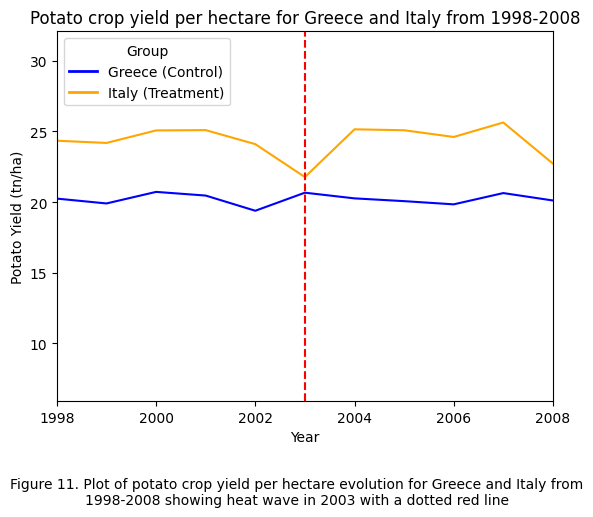

In [168]:
#plotting the temperature of Italy and Greece to identify a temperature shock
url = "https://raw.githubusercontent.com/RebeccaKessler/Otter_Group_Project/main/Data%20for%20Final%20Project/Panel_Analysis_absolute.csv"
df_panel_absolute = pd.read_csv(url)

italy_data = df_panel_absolute[df_panel_absolute['Area'] == 'Italy']
greece_data = df_panel_absolute[df_panel_absolute['Area'] == 'Greece']

control_country = 'Greece'
df_panel_absolute['treatment'] = np.where(df_panel_absolute['Area'] == 'Italy', 1,
                           np.where(df_panel_absolute['Area'] == control_country, 0, np.nan))

df_did = df_panel_absolute.dropna(subset=['treatment'])
df_did['Year'] = pd.to_numeric(df_did['Year'])

palette = {0.0: 'blue', 1.0: 'orange'}

# Set the palette for both lineplot and legend
sns.set_palette(palette.values())


sns.lineplot(x='Year', y='Value_Y', hue='treatment', data=df_did, estimator=np.mean, palette=palette)
plt.title('Potato crop yield per hectare for Greece and Italy from 1998-2008')
plt.ylabel('Potato Yield (tn/ha)')
plt.xlabel('Year')
plt.axvline(x=2003, color='red', linestyle='--', label='Temperature shock in 2003')

# adjust titles in the legend
legend_titles = ['Greece (Control)', 'Italy (Treatment)']
treatment_values = df_did['treatment'].unique()
legend_handles = [plt.Line2D([0], [0], color=palette[label], lw=2) for label in treatment_values]

plt.legend(title='Group', loc='upper left', labels=legend_titles, handles=legend_handles)
plt.xlim(1998, 2008)
plt.figtext(0.5, -0.1, 'Figure 11. Plot of potato crop yield per hectare evolution for Greece and Italy from 1998-2008 showing heat wave in 2003 with a dotted red line', ha='center',wrap='true')

plt.show()

As seen in Figure 11, Italy experienced a significant decrease in potato yields in 2003. The negative coefficient (-16.59) representing the difference in the average change in potato growth rates between Italy and Greece during the shock compared to the other years indicates a strong negative impact of the temperature shock on Italy’s potato growth rate in 2003. Given that the yield rates have moved largely in parallel between Italy and Greece before and after the shock, this result suggests that the temperature shock in 2003 caused a significant drop in the yield rate in Italy. This observed difference is statistically significant (p = 0.021), thus providing evidence for a causal link between temperature increases, particularly temperature shocks, and yield rates.

However, these results need to be considered with caution. The DiD only focuses on two countries and compares a shock during one period to the pre- and post-shock period. To confirm this result, a larger sample and a longer shock period would be required.


## 5. Limitations and extensions

Before we conclude, we will discuss the limitations we faced and propose interesting avenues for future research

The **low R²** values obtained from our study imply that any extrapolation or generalization needs to be taken with care. While a low  R²  does not diminish the significance of the results, it suggests that the model can only explain a very small proportion of the variance in yield rates. This might be due to substantial unobserved variability or the neglection of relevant factors.

One of these **confounding factors** might be droughts, floods, pests, atmospheric CO<sub>2</sub>, and a better proxy for agricultural technology. This study used GDP per capita as a proxy not only for the level of development and the available agricultural infrastructure but also for the use of agricultural technology as suggested by other authors (Ehsan Najaf et al. 2018). This variable could be replaced by Agriculture expenditure index for example to better control for technology.

Furthermore, countries with a **disruption in potato production due to political conflicts** had to be omitted from the study. The robustness checks show that their exclusion did not drastically change the results (Appendix 2.5.2), however finding ways of controlling for resilience towards adverse weather events and socio-political instabilities could be interesting for future research.

## 6. Conclusion

Summarizing, the panel analysis demonstrates a **negative correlation between increasing temperature and potato yield rates**. The introduction of a +2°C threshold suggests that the impact of temperature on potato yields significantly increases once this threshold is surpassed.  Regions experiencing reduced precipitation show more vulnerability for yield rate decrease at higher temperatures. And last but not least, the difference-in-difference method shows a significant yield difference between a country that experienced a temperature shock and one that did not, suggesting a causal effect of increasing temperature on decrasing yield rates.

These results are of utmost **relevance in the context of the SDGs** and global food security. Potato yields, being an important agricultural output especially in developing countries, contribute substantially to several SDGs such as Zero Hunger, Good Health and Well-Being , and Life on Land. Decreasing potato growth rates due to higher temperatures and changing rainfall patterns can adversely affect the achievement of these goals and endanger global food security.

The findings of this study suggest that achieving the SDGs and ensuring global food security might become increasingly difficult with further global warming. As such, proactive measures and informed policies are important to address and mitigate the potential adverse consequences of global warming on global potato yields.


## 7. References


1.   Albert, S. (2023) How to plant, grow, and harvest potatoes, Harvest to Table. Available at: https://harvesttotable.com/how_to_grow_potatoes/ (Accessed: 11 December 2023).
2. Civil Eats Editors (2019) As awareness grows about food’s role in climate change, what solutions exist?, Civil Eats. Available at: https://civileats.com/2019/02/19/as-awareness-grows-about-foods-role-in-climate-change-what-solutions-exist/ (Accessed: 11 December 2023).
3. Delleman, J. (2019) Temperature effect on potato growth, PotatoWorld Blog. Available at: https://blog.potatoworld.eu/temperature-effect-on-growth (Accessed: 11 December 2023).
4. Devaux, A. et al. (2021) ‘The potato of the future: Opportunities and challenges in sustainable agri-food systems’, Potato Research, 64(4), pp. 681–720. doi:10.1007/s11540-021-09501-4.
5. Gelaye, Y. (2023) ‘Effect of combined application of organic manure and nitrogen fertilizer rates on yield and yield components of potato: A Review’, Cogent Food &amp;amp; Agriculture, 9(1). doi:10.1080/23311932.2023.2217603.
6. Gunjal, K. et al. (2010) FAO/WFP CROP AND FOOD SECURITY ASSESSMENT MISSION TO THE DEMOCRATIC PEOPLE’S REPUBLIC OF KOREAS, FAO/WFP Crop and Food Security Assessment Mission to D.P.R. Korea, November 2010. Available at: https://www.fao.org/3/al968e/al968e00.htm (Accessed: 21 December 2023).
7. Hijmans, R.J. (2001) ‘Global distribution of the potato crop’, American Journal of Potato Research, 78(6), pp. 403–412. doi:10.1007/bf02896371.
8. Kuradusenge, M. et al. (2023) ‘Crop yield prediction using machine learning models: Case of Irish potato and maize’, Agriculture, 13(1), p. 225. doi:10.3390/agriculture13010225.
9. Moseman, A. and Elfatih, E. (2023) Where will people experience the most warming from climate change?, MIT Climate Portal. Available at: https://climate.mit.edu/ask-mit/where-will-people-experience-most-warming-climate-change (Accessed: 18 December 2023).
10. Pulatov, B. et al. (2015) ‘Modeling climate change impact on potato crop phenology, and risk of frost damage and heat stress in Northern Europe’, Agricultural and Forest Meteorology, 214–215, pp. 281–292. doi:10.1016/j.agrformet.2015.08.266.
11. Rykaczewska, K. (2013) ‘The impact of high temperature during growing season on potato cultivars with different response to environmental stresses’, American Journal of Plant Sciences, 04(12), pp. 2386–2393. doi:10.4236/ajps.2013.412295.
12. Schafleitner, R. (2009) ‘Growing more potatoes with less water’, Tropical Plant Biology, 2(3–4), pp. 111–121. doi:10.1007/s12042-009-9033-6.
13. Stark, J.C. et al. (2013) ‘Potato cultivar response to seasonal drought patterns’, American Journal of Potato Research, 90(3), pp. 207–216. doi:10.1007/s12230-012-9285-9.
14. Thompson, M. et al. (2017) ‘Effects of elevated carbon dioxide on photosynthesis and carbon partitioning: A perspective on Root Sugar Sensing and hormonal crosstalk’, Frontiers in Physiology, 8. doi:10.3389/fphys.2017.00578.
15. Yang, Q., Huang, X. and Tang, Q. (2020) ‘Global assessment of the impact of irrigation on land surface temperature’, Science Bulletin, 65(17), pp. 1440–1443. doi:10.1016/j.scib.2020.04.005.